<a href="https://colab.research.google.com/github/pujaroy280/Data-Analytics-Microcredential/blob/main/(PR)_COVID19_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [1]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
# load a csv(comma seperated values) file into a DataFrame

In [3]:
df.head()
# return the first 5 rows of the dataframe

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [4]:
df.shape
# returns a tuple containing the shape of the DataFrame. The shape is the rows and columns (rows, cols) of the DataFrame.

(48054, 5)

In [5]:
df.columns
# returns the label of each column in the DataFrame, similar to attributes of a relation

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Analyzing New York state data for Covid 19

In [6]:
ny_df = df[df['state']=='New York']
# create a new DataFrame ny_df, derived from df, with rows where state == 'New York.

In [7]:
ny_df.head()
# return first 5 rows from DataFrame ny_df

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [8]:
ny_df.shape
# returns a tuple containing the shape of ny_df. 

(870, 5)

In [9]:
ny_df.tail()
# returns the last 5 rows from ny_df

,date,state,fips,cases,deaths
47808,2022-07-14,New York,36,5691891,69223
47864,2022-07-15,New York,36,5700453,69245
47920,2022-07-16,New York,36,5703638,69245
47976,2022-07-17,New York,36,5706285,69245
48032,2022-07-18,New York,36,5722320,69268


In [10]:
#first death in NY

first_ny_death = ny_df[ny_df['deaths']!=0]
# create new DataFrame derived from ny_df where deaths > 0. 
first_ny_death.head()
# return first 5 rows of first_ny_death; returns first 5 days with deaths from Covid in New York.

,date,state,fips,cases,deaths
669,2020-03-14,New York,36,610,2
722,2020-03-15,New York,36,732,6
775,2020-03-16,New York,36,950,10
828,2020-03-17,New York,36,1375,18
882,2020-03-18,New York,36,2387,32


In [11]:
ny_df['cases'].max()
# Returns max number from 'cases' column in ny_df


5722320

In [12]:
# not a correct way of calculating total count bcoz data is cumulative
ny_df['cases'].sum()
#  returns sum of all cases in ny_df

1909853094

Finding new covid 19 cases on daily basis (new cases added everyday)

In [13]:
#new cases for NY
# type(ny_df['cases'])

newcase = []
previuos_case = 0
for index, row in ny_df.iterrows():
    '''
    The iterrows() method generates an iterator object of the DataFrame, allowing us to iterate each row in the DataFrame.
    Each iteration produces an index object and a row object (a Pandas Series object).
    source: https://www.w3schools.com/python/pandas/ref_df_iterrows.asp 
    '''
    current_case = row['cases']
    newcase_count = current_case - previuos_case
    previuos_case = current_case
    newcase.append(newcase_count)
    # print(newcase_count)

  # adds a new column that shows increase in cases from previous day

In [14]:
ny_df['new_cases'] = newcase

# Propbably assigns newcase to the "new_cases" column in the dataframe (df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
ny_df.head(10)
# returns first 10 days of COVID cases in New York

,date,state,fips,cases,deaths,new_cases
246,2020-03-01,New York,36,1,0,1
261,2020-03-02,New York,36,1,0,0
276,2020-03-03,New York,36,2,0,1
293,2020-03-04,New York,36,11,0,9
313,2020-03-05,New York,36,22,0,11
338,2020-03-06,New York,36,44,0,22
369,2020-03-07,New York,36,89,0,45
404,2020-03-08,New York,36,106,0,17
440,2020-03-09,New York,36,142,0,36
478,2020-03-10,New York,36,173,0,31


In [16]:
ny_df['new_cases'].sum()
# returns sum of new_cases from ny_df

5722320

In [17]:
ny_cases = ny_df['cases']
ny_deaths = ny_df['deaths']
ny_dates = ny_df['date']
ny_new_cases = ny_df['new_cases']

# create new series from ny_df with respective labels, i.e. ny_cases series created with 'cases' in ny_df.

In [18]:
type(ny_new_cases)

# returns the type of the specified object. 

pandas.core.series.Series

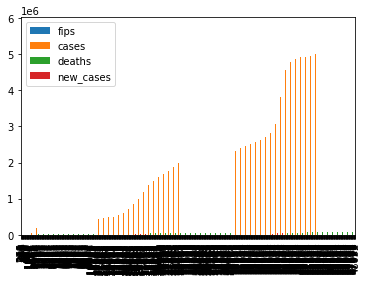

In [19]:
ny_df.plot(kind='bar')

# plot() method to create diagrams
# specify that you want a bar plot with 'kind=' arguement

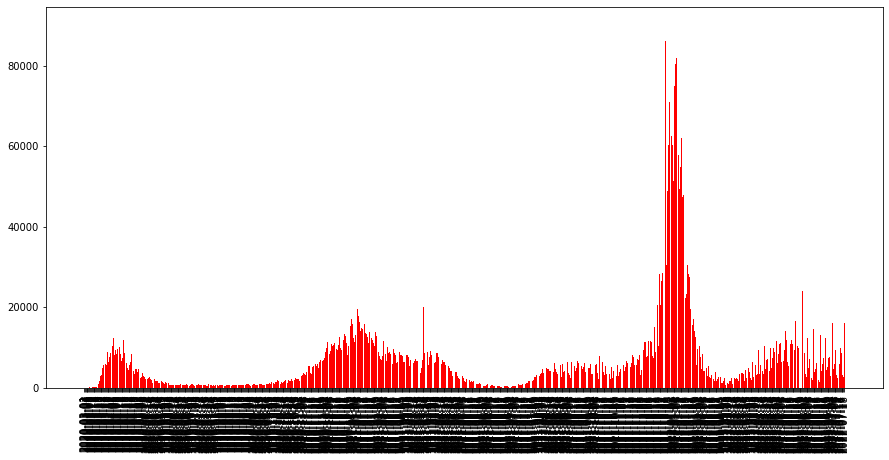

In [20]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates, height=ny_new_cases, color='red')
plt.xticks(rotation=90)
plt.show()

# Display figure with figsize= (width, height) in inches.
# .bar with x axis = ny_dates and y axis with new cases in NY. And make graph red.
# .xticks rotate the current x axis tick by 90 degrees. 

# Task4: Understand NY covid 19 data in last 30 days

In [21]:
ny_cases_30 = ny_df['cases'][-31:-1]
ny_deaths_30 = ny_df['deaths'] [-31:-1]
ny_dates_30 = ny_df['date'][-31:-1]
ny_new_cases_30 = ny_df['new_cases'][-31:-1]


# get COVID in NY data from last 30 days, assign each series with respective label data

In [22]:
# ny_dates_30

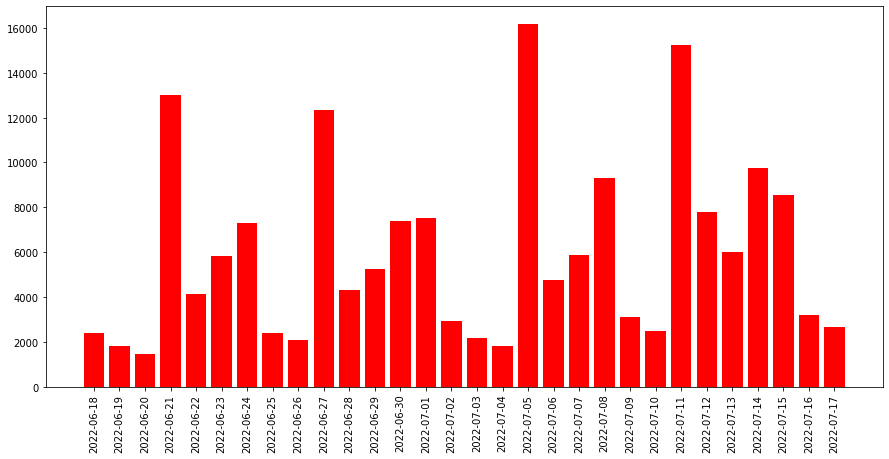

In [23]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color='red')
plt.xticks(rotation=90)
plt.show()

# plot new cases of covid in NY from previous 30 days. Smaller and more readable than last graph.

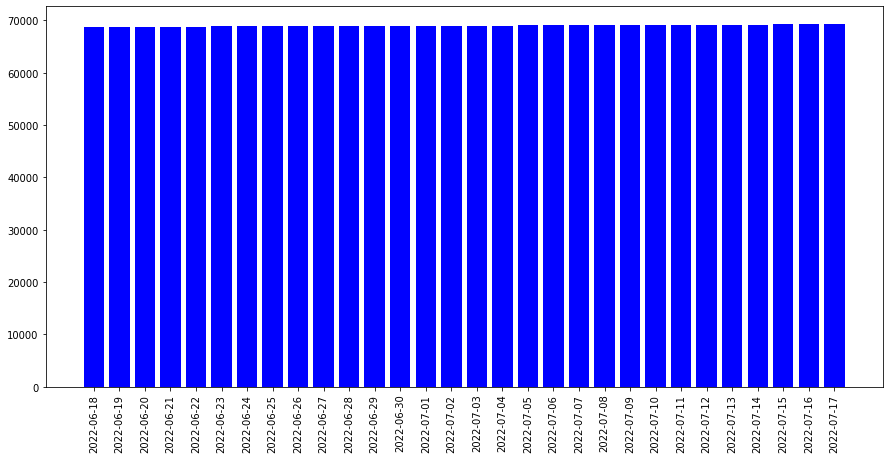

In [24]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_deaths_30, color='blue')
plt.xticks(rotation=90)
plt.show()

# plot deaths from COVID in NY, from past 30 days. Deaths were very high, cases were increasing.

# Comparing Covid 19 data with different states

Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona

In [25]:
states = ['New York', 'California','Florida', 'Texas','Arizona']

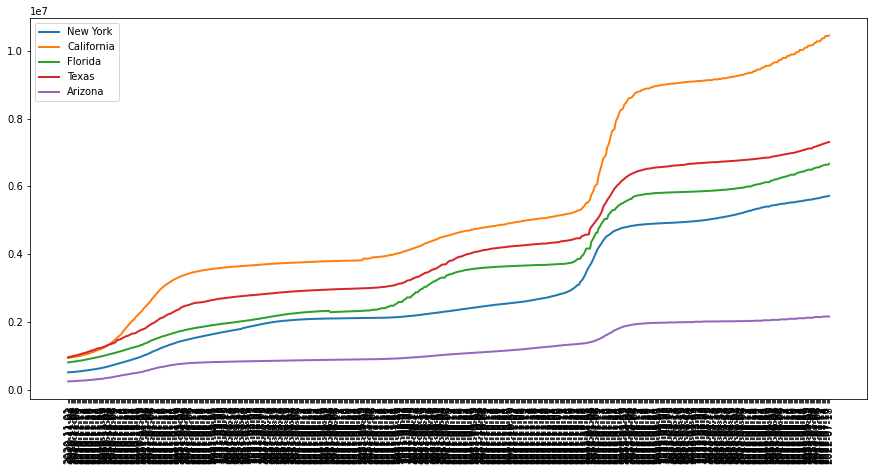

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
48049,2022-07-18,Virginia,51,1919590,20812
48050,2022-07-18,Washington,53,1712820,13504
48051,2022-07-18,West Virginia,54,544911,7102
48052,2022-07-18,Wisconsin,55,1754652,14859


In [26]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-11-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2
           )
  plt.xticks(rotation=90)
plt.legend(states)
plt.show()

# use a for loop on df(data of US), plot date (x-axis) and cases(y-axis) from NY, CA, FL, AZ.
# Graph is getting data for dates after 11/01/2020
# Y axis seems to be scaled with ticks of 0.2 millions 

df

# Conclusion

Below are the conclusions:



1.   Conclusion 1:
     Deaths in NY for the last 30 days were close to 35k daily. Whereas, new cases were lower than deaths daily in New York since new cases were increasing steadily. The graph of New York shows an increase of COVID cases near the end of 2020 year. This could be due to gatherings associated with the Thanksgiving holiday, allowing a greater chance for transmission of COVID. 
2.   Conclusion 2:
The most popular cities (NY, CA, FL, TX) had a increasing number of cases, which led to an increase in cases before returning to a steady growth. Arizona, with less population, had a spike but not as enormous as more densely populated cities. This could be due to the fact that more people allowed more chances for transmission of COVID, thus more cases. 

